In [1]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation
from openpiv import widim

import numpy as np
import matplotlib.pyplot as plt

import imageio
from pylab import *
%matplotlib inline

from skimage import img_as_uint

In [2]:
frame_a  = tools.imread('../test3/Y4-S3_Camera000398.tif')  
frame_b  = tools.imread('../test3/Y4-S3_Camera000399.tif')

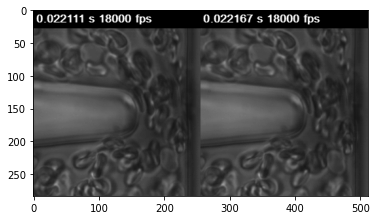

In [3]:
# for whatever reason the shape of frame_a is (3, 284, 256)
# so we first tranpose to the RGB image and then convert to the gray scale

# frame_a = img_as_uint(rgb2gray(frame_a))
# frame_b = img_as_uint(rgb2gray(frame_b))
plt.imshow(np.c_[frame_a,frame_b],cmap=plt.cm.gray)

In [4]:
# Use Cython version: process.pyx

u, v, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                   frame_b.astype(np.int32), 
                                                   window_size=32, overlap=8, 
                                                     dt=.1, 
                                                     sig2noise_method='peak2peak' )

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=32, overlap=8 )

u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v, sig2noise, mask, 'Y4-S3_Camera000398_a.txt' )

In [5]:
# Use Python version, pyprocess:

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap=8, dt=.1, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=32, overlap=8 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v, sig2noise, mask, 'Y4-S3_Camera000398_b.txt' )

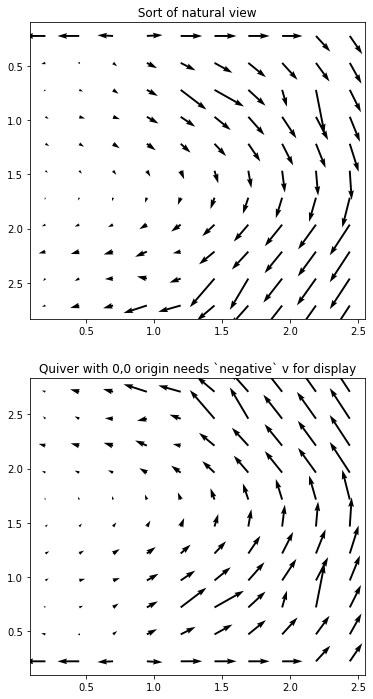

In [6]:
# "natural" view without image
fig,ax = plt.subplots(2,1,figsize=(6,12))
ax[0].invert_yaxis()
ax[0].quiver(x,y,u,v)
ax[0].set_title(' Sort of natural view ')

ax[1].quiver(x,y,u,-v)
ax[1].set_title('Quiver with 0,0 origin needs `negative` v for display');
# plt.quiver(x,y,u,v)

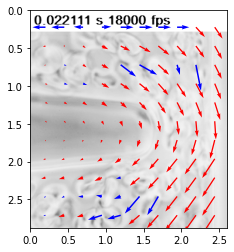

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [7]:
tools.display_vector_field('Y4-S3_Camera000398_a.txt',on_img=True,image_name='../test3/Y4-S3_Camera000398.tif',scaling_factor=96.52)

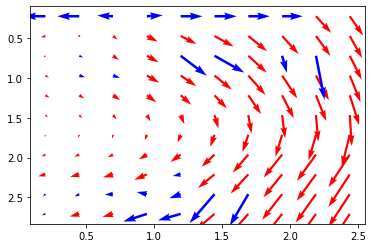

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [8]:
tools.display_vector_field('Y4-S3_Camera000398_a.txt')

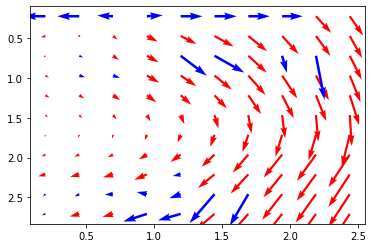

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [9]:
tools.display_vector_field('Y4-S3_Camera000398_b.txt')

In [10]:
x,y,u,v, mask = widim.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=32, overlap_ratio=0.25, coarse_factor=0, dt=0.1, validation_method='mean_velocity', trust_1st_iter=0, validation_iter=0, tolerance=0.7, nb_iter_max=1, sig2noise_method='peak2peak')

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [284, 256])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.25)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 0.10000000149011612)
('     ', 'validation method', ' | ', 'None')
('     ', 'number of validation iterations', ' | ', 0)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([11], dtype=int32))
('     ', 'Ncol', ' | ', array([10], dtype=int32))
('     ', 'Window sizes', ' | ', array([32], dtype=int32))
--------------------------------

In [11]:
tools.save(x, y, u, v, 0*v, 0*v, 'Y4-S3_Camera000398_widim1.txt' )

In [12]:
x,y,u,v, mask = widim.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=0.1, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [284, 256])
('     ', 'total number of iterations', ' | ', 4)
('     ', 'overlap ratio', ' | ', 0.25)
('     ', 'coarse factor', ' | ', 2)
('     ', 'time step', ' | ', 0.10000000149011612)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 2)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([ 5, 11, 23, 23], dtype=int32))
('     ', 'Ncol', ' | ', array([ 5, 10, 21, 21], dtype=int32))
('     ', 'Window sizes', ' | ', array([64, 32, 16, 16], d

/home/user/Downloads/repos/openpiv-python/openpiv/pyprocess.py:607: RuntimeWarning: invalid value encountered in true_divide
  window /= np.std(window, keepdims=True, dtype=np.float32)


..[DONE]
(' --residual : ', 0.8993271422547373)
Starting validation..
('Validation, iteration number ', 0)
 
('Validation, iteration number ', 1)
 
..[DONE]
 
going to next iteration.. 
performing interpolation of the displacement field
 
('..[DONE] -----> going to iteration ', 3)
 
('ITERATION # ', 3)
..[DONE]
(' --residual : ', 0.8346273478479216)
Starting validation..
('Validation, iteration number ', 0)
 
('Validation, iteration number ', 1)
 
..[DONE]
 
//////////////////////////////////////////////////////////////////
end of iterative process.. Re-arranging vector fields..
...[DONE]
-------------------------------------------------------------
('[DONE] ..after ', 41.52682590484619, 'seconds ')
-------------------------------------------------------------


In [13]:
tools.save(x, y, u, v, 0*v, 0*v, 'Y4-S3_Camera000398_widim2.txt' )

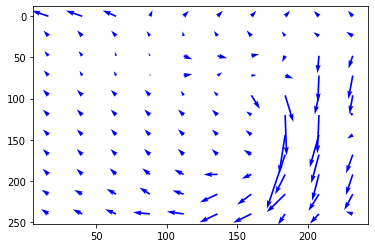

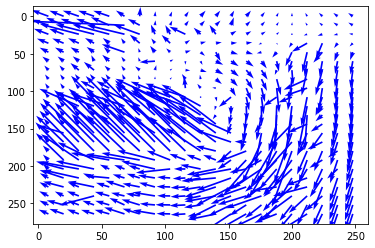

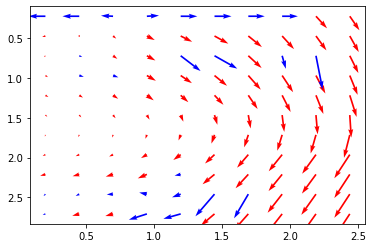

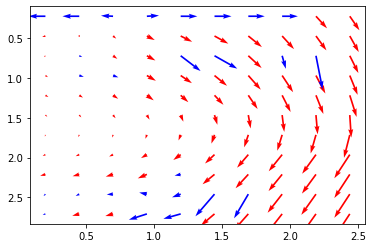

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [14]:
tools.display_vector_field('Y4-S3_Camera000398_widim1.txt', widim=True, scale=300, width=0.005)
tools.display_vector_field('Y4-S3_Camera000398_widim2.txt', widim=True, scale=300, width=0.005)
tools.display_vector_field('Y4-S3_Camera000398_a.txt', scale=2, width=0.005,scaling_factor=96.52)
tools.display_vector_field('Y4-S3_Camera000398_b.txt', scale=2, width=0.005,scaling_factor=96.52)